In [2]:
%matplotlib inline

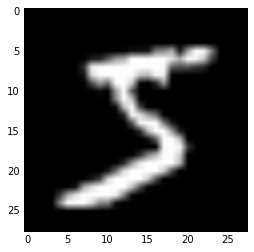

In [6]:
# how to load the mnist dataset, how to plot the handwriting images.
import numpy as np
from matplotlib import pyplot as plt
import gzip

fimage = gzip.open('./data/train-images-idx3-ubyte.gz','rb')
#skip the header
fimage.read(16)

# read the first image, which size=784
img1 = fimage.read(784)
listImage = list(img1)

# convert char to int
listImage10 = map(lambda x:ord(x),listImage)

# convert list to buffer (byte array)
buf = bytearray(listImage10)

# convert to ndarray in numpy
# uint8 
ndimg  = np.ndarray((28,28),dtype=np.uint8,buffer=buf)  
plt.imshow(ndimg,cmap='gray')

# plt.imshow(ndimg,cmap=plt.cm.gray)
fimage.close()

In [7]:
# define method for loading mnist dataset in .gz format
# return ndarray of numpy
import gzip
import numpy as np
from matplotlib import pyplot as plt
import six

train_images = './data/train-images-idx3-ubyte.gz'
train_labels = './data/train-labels-idx1-ubyte.gz'
test_images = './data/t10k-images-idx3-ubyte.gz'
test_labels = './data/t10k-labels-idx1-ubyte.gz'
dim=784
train_num = 60000
test_num = 10000

def load_mnist(images, labels, dim, num):
    data = np.zeros(num * dim, dtype=np.uint8).reshape((num, dim))
    target = np.zeros(num, dtype=np.uint8).reshape((num, ))

    with gzip.open(images, 'rb') as f_images,\
            gzip.open(labels, 'rb') as f_labels:
        f_images.read(16) # skip file header ?
        f_labels.read(8)  # skip file header ?
        for i in six.moves.range(num):
            target[i] = ord(f_labels.read(1))
            for j in six.moves.range(dim):
                data[i, j] = ord(f_images.read(1))

    return data, target

In [8]:
# load train data.
data,target = load_mnist(train_images,train_labels,dim, train_num)
plt.imshow(data[0].reshape(28,28),cmap='gray')
# load test data.
test_data,test_target = load_mnist(test_images,test_labels,dim, test_num)

In [24]:
def convert2pickle():
    print('Converting training data...')
    data_train, target_train = load_mnist(train_images,train_labels,dim, train_num)
    print('Done')
    print('Converting test data...')
    data_test, target_test = load_mnist(test_images,test_labels,dim, test_num)
    mnist = {'data': np.append(data_train, data_test, axis=0),
             'target': np.append(target_train, target_test, axis=0)}
    print('Done')
    print('Save output...')
    with open('gen_mnist.pkl', 'wb') as output:
        six.moves.cPickle.dump(mnist, output, -1)
    print('Done')
    print('Convert completed')

In [25]:
convert2pickle()

Converting training data...
Done
Converting test data...
Done
Save output...
Done
Convert completed


In [27]:
def load_mnist_data(filename='mnist.pkl'):
    with open(filename, 'rb') as mnist_pickle:
        mnist = six.moves.cPickle.load(mnist_pickle)
    return mnist

In [29]:
mnist = load_mnist_data()

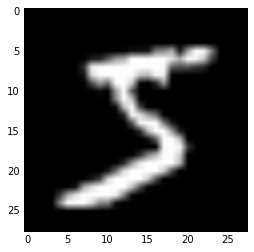

In [31]:
# show image in mnist sample 
img = mnist['data'][0]
plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray)

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation

model = Sequential([Dense(32, input_dim=784), 
                   Activation('relu'),
                   Dense(output_dim=10),
                   Activation('softmax'),])

from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(data, target, nb_epoch=5, batch_size=32)

loss_and_metrics = model.evaluate(test_data, test_target, batch_size=32)

print loss_and_metrics

SyntaxError: invalid syntax (<ipython-input-2-238c016655eb>, line 17)

In [14]:
# download minist 
from keras.datasets import mnist as mnist_dataset
mnist_dataset.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ..., 
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ..., 
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ..., 
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ..., 
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ..., 
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0,

In [ ]:
"""
machine learning 详细基础
1. 学习理解机器学习 模式分类 ：https://github.com/rasbt/pattern_classification
2. andrew ng 写的ufldl深度学习教程demo code ： https://github.com/jatinshah/ufldl_tutorial

"""


In [5]:

'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# the data, shuffled and split between train and test sets
#(X_train, y_train), (X_test, y_test) = (data,target),(test_data,test_target)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 148s - loss: 0.3937 - acc: 0.8805 - val_loss: 0.1001 - val_acc: 0.9684
Epoch 2/12
60000/60000 [==============================] - 147s - loss: 0.1476 - acc: 0.9566 - val_loss: 0.0652 - val_acc: 0.9801
Epoch 3/12
60000/60000 [==============================] - 150s - loss: 0.1114 - acc: 0.9672 - val_loss: 0.0523 - val_acc: 0.9834
Epoch 4/12
60000/60000 [==============================] - 150s - loss: 0.0932 - acc: 0.9720 - val_loss: 0.0456 - val_acc: 0.9847
Epoch 5/12
60000/60000 [==============================] - 149s - loss: 0.0808 - acc: 0.9760 - val_loss: 0.0412 - val_acc: 0.9862
Epoch 6/12
60000/60000 [==============================] - 147s - loss: 0.0716 - acc: 0.9785 - val_loss: 0.0399 - val_acc: 0.9872
Epoch 7/12
60000/60000 [==============================] - 148s - loss: 0.0662 - acc: 0.9811 - val_loss:

In [4]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils


batch_size = 128
nb_classes = 10
nb_epoch = 20

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_7 (Dense)                  (None, 512)           401920      dense_input_3[0][0]              
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 512)           0           dense_7[0][0]                    
____________________________________________________________________________________________________
dropout_5 (Dropout)              (None, 512)           0           activation_7[0][0]               
____________________________________________________________________________________________________
dense_8 (Dense)                  (None, 512)           262656      dropout_5[0][0]                  
____________________________________________________